<a href="https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/monovariata_bivariata_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corso su Colaboratory
## Questo notebook contiene la descrizione dell'utilizzo della libreria marradi.py  per quanto riguarda l'analisi monovariata e bivariata

## Configurazione del file di colaboratory - non modificare. 
In questa cella vengono scaricate ed installate le librerie necessarie per lavorare 

In [1]:
#effettuo l'importazione della libreria per il controllo del sistema operativo
import os
#effettuo l'importazione della libreria statistica Pandas
import pandas as pd
import matplotlib.pyplot as plt

#effettuo l'importazione della libreria per il controllo del sistema operativo
import os
#effettuo l'importazione della libreria statistica Pandas
import pandas as pd
import matplotlib.pyplot as plt

# scarico dal web ed installo la libreria marradi
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
from marradi import dist_frequenza, plot_dist_frequenza, estrai_valore, tabella_di_contingenza
from tools import download_gspread

# scarico ed installo la versione aggiornata di seaborn.
!pip install git+https://github.com/mwaskom/seaborn.git
import seaborn as sns

#installiamo la libreria per interagire con i fogli di google
!pip install --upgrade -q gspread




--2018-11-03 09:12:41--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6481 (6.3K) [text/plain]
Saving to: ‘marradi.py’

marradi.py          100%[===================>]   6.33K  --.-KB/s    in 0s      

2018-11-03 09:12:42 (68.0 MB/s) - ‘marradi.py’ saved [6481/6481]

--2018-11-03 09:12:44--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1754 (1.7K) [text/pla

## Abilitare l'accesso ai file di google. E' necessario essere in possesso di un account di google

In [0]:
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())



In [3]:
#scarico i dati di valutazione del questionario
questionario = download_gspread("1PiMvG2mUAQuWAuZeedL0mTyY1xy9fsggHh64v5D99w0", key = True, gc = gc)

questionario.head(3)

,Informazioni cronologiche,1) Codice classe,Conosci queste tecnologie per l'analisi dei dati? [2_1) Foglio di calcolo (es. excel)],Conosci queste tecnologie per l'analisi dei dati? [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot],Conosci queste tecnologie per l'analisi dei dati? [2_3) Foglio di calcolo - Utilizzo di Macro],Conosci queste tecnologie per l'analisi dei dati? [2_4) Linguaggio e DB SQL],Conosci queste tecnologie per l'analisi dei dati? [2_5) Linguaggio R - Statistica],Conosci queste tecnologie per l'analisi dei dati? [2_6) Linguaggio Python],Conosci queste tecnologie per l'analisi dei dati? [2_7) Software SAS],Conosci queste tecnologie per l'analisi dei dati? [2_8) Software STATA],...,Prima di questa lezione avevi mai sentito parlare di? [4_4) GIS(Geographic information system)],Prima di questa lezione avevi mai sentito parlare di? [4_5) Social Data],Prima di questa lezione avevi mai sentito parlare di? [4_6) Machine Learning],Prima di questa lezione avevi mai sentito parlare di? [4_7) Realtà virtuale],Prima di questa lezione avevi mai sentito parlare di? [4_8) Realtà aumentata],Prima di questa lezione avevi mai sentito parlare di? [4_9) Intelligenza Artificiale],Prima di questa lezione avevi mai sentito parlare di? [4_10) Open Source],Prima di questa lezione avevi mai sentito parlare di? [4_11) Open Science],Prima di questa lezione avevi mai sentito parlare di? [4_12) Open Access],Hai un account google?
1,24/09/2018 17.19.09,Magnier,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,2 -Qualche volta. ma non ho capito bene di cos...,1 - No mai,2 -Qualche volta. ma non ho capito bene di cos...,Si
2,24/09/2018 17.19.11,magnier,5 - Ho utilizzato con successo per lavoro o pe...,2 - Ne ho sentito parlare. ma non l'ho mai ut...,2 - Ne ho sentito parlare. ma non l'ho mai ut...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,1 - No mai,1 - No mai,Si
3,24/09/2018 17.19.39,magnier,3 - Ho provato questa tecnologia. ma non sono...,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,2 -Qualche volta. ma non ho capito bene di cos...,Si


In [20]:
questionario.tail(3)

,Informazioni cronologiche,1) Codice classe,Conosci queste tecnologie per l'analisi dei dati? [2_1) Foglio di calcolo (es. excel)],Conosci queste tecnologie per l'analisi dei dati? [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot],Conosci queste tecnologie per l'analisi dei dati? [2_3) Foglio di calcolo - Utilizzo di Macro],Conosci queste tecnologie per l'analisi dei dati? [2_4) Linguaggio e DB SQL],Conosci queste tecnologie per l'analisi dei dati? [2_5) Linguaggio R - Statistica],Conosci queste tecnologie per l'analisi dei dati? [2_6) Linguaggio Python],Conosci queste tecnologie per l'analisi dei dati? [2_7) Software SAS],Conosci queste tecnologie per l'analisi dei dati? [2_8) Software STATA],...,Prima di questa lezione avevi mai sentito parlare di? [4_4) GIS(Geographic information system)],Prima di questa lezione avevi mai sentito parlare di? [4_5) Social Data],Prima di questa lezione avevi mai sentito parlare di? [4_6) Machine Learning],Prima di questa lezione avevi mai sentito parlare di? [4_7) Realtà virtuale],Prima di questa lezione avevi mai sentito parlare di? [4_8) Realtà aumentata],Prima di questa lezione avevi mai sentito parlare di? [4_9) Intelligenza Artificiale],Prima di questa lezione avevi mai sentito parlare di? [4_10) Open Source],Prima di questa lezione avevi mai sentito parlare di? [4_11) Open Science],Prima di questa lezione avevi mai sentito parlare di? [4_12) Open Access],Hai un account google?
28,24/09/2018 17.32.35,Magnier,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,2 -Qualche volta. ma non ho capito bene di cos...,1 - No mai,2 -Qualche volta. ma non ho capito bene di cos...,Si
29,24/09/2018 17.34.00,magnier,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,Si
30,24/09/2018 17.53.49,Magnier,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,2 -Qualche volta. ma non ho capito bene di cos...,1 - No mai,2 -Qualche volta. ma non ho capito bene di cos...,Si


In [4]:
questionario.columns

Index(['Informazioni cronologiche', '1) Codice classe',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_1) Foglio di calcolo (es. excel)]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_3) Foglio di calcolo - Utilizzo di Macro]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_4) Linguaggio e DB SQL]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_5) Linguaggio R - Statistica]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_6) Linguaggio Python]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_7) Software SAS]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_8) Software STATA]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_9) Software SPSS]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_10) Software GEPHI (Network Analisys)]',
       'C

In [5]:
ordinate = dist_frequenza(questionario.applymap(estrai_valore),
               "Conosci queste tecnologie per l'analisi dei dati?  [2_1) Foglio di calcolo (es. excel)]",
               tipo = "ordinale",
               lista_ordinale = [1,2,3,4,5,6])

ordinate

,Frequenze,Percentuale,Cumulata
1,0.0,0.00,0
2,5.0,16.67,16.6667
3,17.0,56.67,73.3333
4,7.0,23.33,96.6667
5,1.0,3.33,100
6,0.0,0.00,100
Totale,30.0,100.00,


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


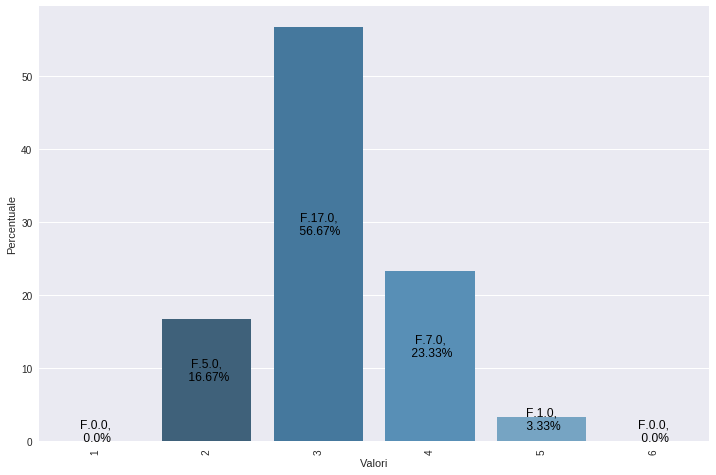

In [6]:
plot_dist_frequenza(ordinate, tipo = "ordinale")

In [0]:
categoriale = dist_frequenza(questionario.applymap(estrai_valore),
               "1) Codice classe",
               tipo = "categoriale")

In [8]:
categoriale

,Frequenze,Percentuale
magnier,12.0,40.00
Magnier,12.0,40.00
magner,2.0,6.67
Magnete,1.0,3.33
Magner,1.0,3.33
manier,1.0,3.33
,1.0,3.33
Totale,30.0,100.00


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


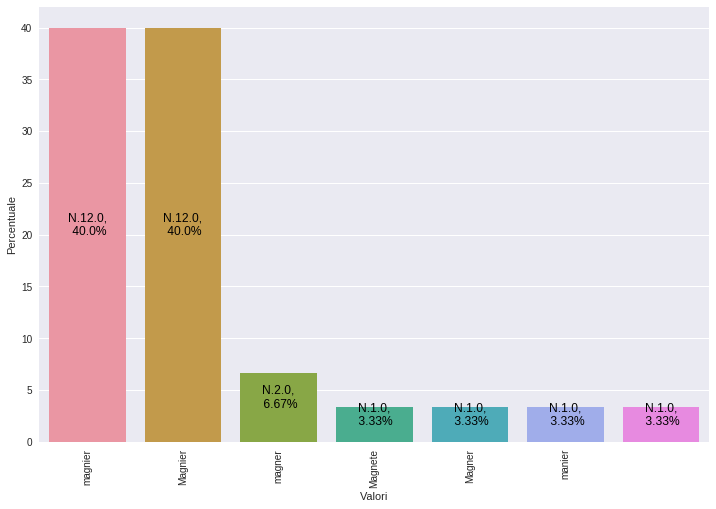

In [9]:
plot_dist_frequenza(categoriale, tipo = "categoriale")

In [0]:
cardinale_freq = pd.DataFrame({"Nome":["Marco", "Piero", "Luigi", "Massimo", "Alberto"], "Età": [34,34,22,32,13]})

In [0]:
cardinale = dist_frequenza(cardinale_freq ,
               "Età",
               tipo = "cardinale")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


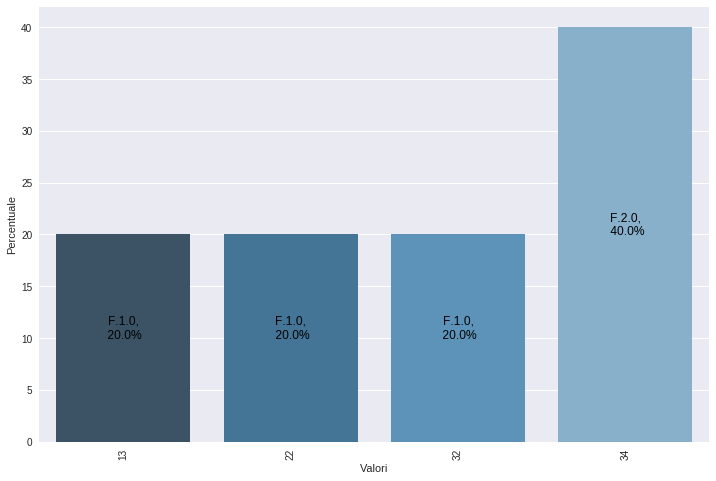

In [12]:
plot_dist_frequenza(cardinale, tipo = "cardinale")

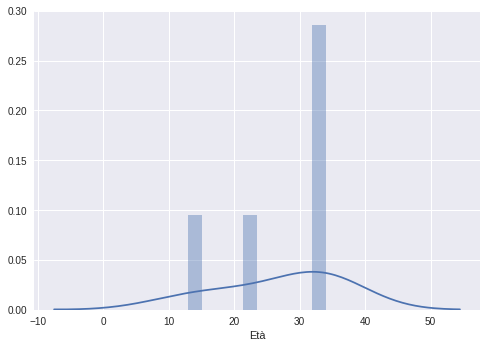

In [13]:
#partire direttamente dai dati in matrice per il distplot
sns.distplot( cardinale_freq["Età"], bins = 10)

## bivariata

In [14]:
help(tabella_di_contingenza)

Help on function tabella_di_contingenza in module marradi:

tabella_di_contingenza(dataframe, colonna_A, colonna_B, ordine_A=False, ordine_B=False, informativo=False)
    dataframe: inserire la tabella su cui si vuole fare la tabulazione incrociata
    colonna_A: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    colonna_B: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    ordine_A: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna A
    ordine_B: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna B
    iformativo: True, permette di avere in una stessa tabella frequenze, frequenze attese e scarti.



In [15]:
col_A = "Conosci queste tecnologie per l'analisi dei dati?  [2_1) Foglio di calcolo (es. excel)]"
col_B = "Conosci queste tecnologie per l'analisi dei dati?  [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot]"

tabella_di_contingenza(dataframe = questionario.applymap(estrai_valore),
                       colonna_A = col_A,
                       colonna_B = col_B)

Conosci queste tecnologie per l'analisi dei dati? [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot],1,2,3,4,All
Conosci queste tecnologie per l'analisi dei dati? [2_1) Foglio di calcolo (es. excel)],,,,,
2,3,2,0,0,5
3,12,3,1,1,17
4,4,0,2,1,7
5,0,1,0,0,1
All,19,6,3,2,30


In [19]:


tabella_di_contingenza(dataframe = questionario.applymap(estrai_valore),
                       colonna_A = col_A,
                       colonna_B = col_B,
                      informativo = True,
                      )

Conosci queste tecnologie per l'analisi dei dati? [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot],1,2,3,4,All
Conosci queste tecnologie per l'analisi dei dati? [2_1) Foglio di calcolo (es. excel)],,,,,
2,3 ( 3.17) ( -0.17),2 ( 1.00) ( 1.00),0 ( 0.50) ( -0.50),0 ( 0.33) ( -0.33),5 ( 5.00) ( 0.00)
3,12 ( 10.77) ( 1.23),3 ( 3.40) ( -0.40),1 ( 1.70) ( -0.70),1 ( 1.13) ( -0.13),17 ( 17.00) ( 0.00)
4,4 ( 4.43) ( -0.43),0 ( 1.40) ( -1.40),2 ( 0.70) ( 1.30),1 ( 0.47) ( 0.53),7 ( 7.00) ( 0.00)
5,0 ( 0.63) ( -0.63),1 ( 0.20) ( 0.80),0 ( 0.10) ( -0.10),0 ( 0.07) ( -0.07),1 ( 1.00) ( 0.00)
All,19 ( 19.00) ( 0.00),6 ( 6.00) ( 0.00),3 ( 3.00) ( 0.00),2 ( 2.00) ( 0.00),30 ( 30.00) ( 0.00)


In [22]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    detail= "Name"
).interactive()

Chart({
  data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0            12.0          8         307.0       130.0              18.0   
  1            11.5          8         350.0       165.0              15.0   
  2            11.0          8         318.0       150.0              18.0   
  3            12.0          8         304.0       150.0              16.0   
  4            10.5          8         302.0       140.0              17.0   
  5            10.0          8         429.0       198.0              15.0   
  6             9.0          8         454.0       220.0              14.0   
  7             8.5          8         440.0       215.0              14.0   
  8            10.0          8         455.0       225.0              14.0   
  9             8.5          8         390.0       190.0              15.0   
  10           17.5          4         133.0       115.0               NaN   
  11           11.5          8         350.0       165.0               NaN   
  12           11.0          8         351.0       153.0               NaN   
  13           10.5          8         383.0       175.0               NaN   
  14           11.0          8         360.0       175.0               NaN   
  15           10.0          8         383.0       170.0              15.0   
  16            8.0          8         340.0       160.0              14.0   
  17            8.0          8         302.0       140.0               NaN   
  18            9.5          8         400.0       150.0              15.0   
  19           10.0          8         455.0       225.0              14.0   
  20           15.0          4         113.0        95.0              24.0   
  21           15.5          6         198.0        95.0              22.0   
  22           15.5          6         199.0        97.0              18.0   
  23           16.0          6         200.0        85.0              21.0   
  24           14.5          4          97.0        88.0              27.0   
  25           20.5          4          97.0        46.0              26.0   
  26           17.5          4         110.0        87.0              25.0   
  27           14.5          4         107.0        90.0              24.0   
  28           17.5          4         104.0        95.0              25.0   
  29           12.5          4         121.0       113.0              26.0   
  ..            ...        ...           ...         ...               ...   
  376          18.6          4         112.0        88.0              27.0   
  377          18.0          4         112.0        88.0              34.0   
  378          16.2          4         112.0        85.0              31.0   
  379          16.0          4         135.0        84.0              29.0   
  380          18.0          4         151.0        90.0              27.0   
  381          16.4          4         140.0        92.0              24.0   
  382          20.5          4         151.0         NaN              23.0   
  383          15.3          4         105.0        74.0              36.0   
  384          18.2          4          91.0        68.0              37.0   
  385          17.6          4          91.0        68.0              31.0   
  386          14.7          4         105.0        63.0              38.0   
  387          17.3          4          98.0        70.0              36.0   
  388          14.5          4         120.0        88.0              36.0   
  389          14.5          4         107.0        75.0              36.0   
  390          16.9          4         108.0        70.0              34.0   
  391          15.0          4          91.0        67.0              38.0   
  392          15.7          4          91.0        67.0              32.0   
  393          16.2          4          91.0        67.0              38.0   
  394          16.4          6         181.0       110.0              25.0   
  395   